<a href="https://colab.research.google.com/github/Junseokee/Mediapipe/blob/main/squat_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 컨볼루션 신경망 
해당 실습은 CNN을 활용한 이진분류 예제입니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import os

base_dir = '/content/drive/MyDrive/Gym_did_it/Squat'
validation_dir = '/content/drive/MyDrive/Gym_did_it/Squat/val'


In [3]:
# import os

# from IPython.display import Image, clear_output
# from glob import glob

# img_list = glob('/content/drive/MyDrive/Gym_did_it/Squat/*.jpg')
# print(len(img_list))
# # txt_list = glob('/content/drive/MyDrive/*.txt')
# # print(len(txt_list))


0


In [4]:
# # 특정 폴더 이미지 삭제
# [os.remove(f) for f in img_list]
# # [os.remove(f) for f in txt_list]

[]

In [49]:
lunge_dir = os.path.join(base_dir + '/down')
stand_dir = os.path.join(base_dir +'/up')
val_lunge_dir = os.path.join(validation_dir + '/down')
val_stand_dir = os.path.join(validation_dir +'/up')
print(lunge_dir)
print(stand_dir)
print(val_stand_dir)
print(val_lunge_dir)

/content/drive/MyDrive/Gym_did_it/Squat/down
/content/drive/MyDrive/Gym_did_it/Squat/up
/content/drive/MyDrive/Gym_did_it/Squat/val/up
/content/drive/MyDrive/Gym_did_it/Squat/val/down


In [50]:
lunge_dir_fnames = os.listdir(lunge_dir)
stand_dir_fnames = os.listdir(stand_dir)
v_lunge_dir_fnames = os.listdir(val_stand_dir)
v_stand_dir_fnames = os.listdir(val_lunge_dir)

In [51]:
print(lunge_dir_fnames[:5])
print(stand_dir_fnames[:5])
print(v_lunge_dir_fnames[:5])
print(v_stand_dir_fnames[:5])

['junseok (25).jpg', 'junseok (21).jpg', 'junseok (23).jpg', 'junseok (22).jpg', 'junseok (27).jpg']
['junseokup (42).jpg', 'junseokup (46).jpg', 'junseokup (40).jpg', 'junseokup (45).jpg', 'junseokup (47).jpg']
['_3.jpg', '_2.jpg', '_4.jpg', '_1.jpg', '_5.jpg']
['_30.jpg', '_27.jpg', '_29.jpg', '_6.jpg', '_9.jpg']


In [52]:
print('학습용 런지 : ', len(lunge_dir_fnames))
print('학습용 스탠딩 : ', len(stand_dir_fnames))
print('학습용 런지 : ', len(v_lunge_dir_fnames))
print('학습용 스탠딩 : ', len(v_stand_dir_fnames))

학습용 런지 :  796
학습용 스탠딩 :  705
학습용 런지 :  11
학습용 스탠딩 :  37


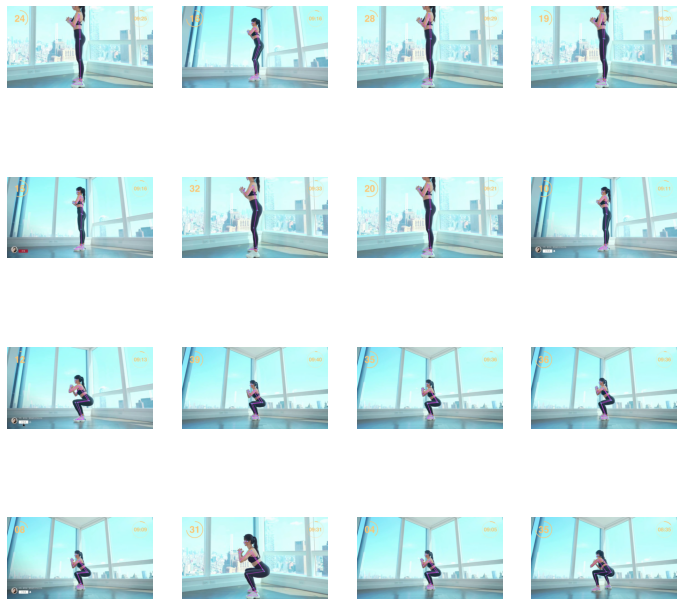

In [53]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4,4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8
next_cat_pix = [os.path.join(stand_dir, fname) for fname in \
                stand_dir_fnames[ pic_index-8:pic_index]]
next_dog_pix = [os.path.join(lunge_dir, fname) for fname in \
                lunge_dir_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [ ]:
flabel={
    'lunge':0,
    'stand':1
}

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale=1./255)
# validation_datagen = ImageDataGenerator(rescale=1./255)

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#---------------------------- 이미지 어그멘테이션
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip = False,
                                   vertical_flip = False,
                                   brightness_range = [0.5, 1.5],
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest')
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [55]:
train_generator = train_datagen.flow_from_directory(base_dir,
                                                    batch_size = 32,
                                                    target_size=(512,288),
                                                    classes = ['up', 'down'],
                                                    color_mode = 'rgb',
                                                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                    batch_size = 32,
                                                    target_size=(512,288),
                                                    classes = ['up', 'down'],
                                                    color_mode = 'rgb',
                                                    class_mode = 'binary')

Found 1501 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2,l1,l1_l2

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', input_shape = (512, 288, 3)))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))


model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu')) 
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Dropout(0.3)) # 드롭아웃 추가
model.add(Flatten())
model.add(Dense(256, activation = 'relu')) 
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = Adam(1e-4),
              loss = 'binary_crossentropy',
              metrics = ['acc'])



In [57]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 검증데티어 손실(val_loss)가 증가하면,
# 과적합 징후이므로 검증 데이터 손실이 5회 증가하면
# 학습을 조기 종료(Early Stopping) 합니다
es = EarlyStopping(monitor='val_loss',
                   mode='min', verbose=1, patience=5)
# ModelCheckpoint를 사용하여 검증 데이터의
# 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다.
mc = ModelCheckpoint('best_mask_model.h5',
                     monitor='val_acc',mode='max',
                     verbose=2, save_best_only = True)

In [58]:
batch_size = 32
def get_step(train_len, batch_size):
  if(train_len % batch_size > 0):
    return train_len // batch_size + 1
  else:
    return train_len // batch_size

history = model.fit(train_generator,
                    epochs = 30,
                    validation_split = 0.3,

                    
                    shuffle = True,
                    workers = -1,
                    callbacks = [es, mc],
                    validation_data = validation_generator)

Epoch 1/30
47/47 [==============================] - ETA: 0s - loss: 0.7430 - acc: 0.5356
Epoch 1: val_acc improved from -inf to 0.37500, saving model to best_mask_model.h5
47/47 [==============================] - 115s 2s/step - loss: 0.7430 - acc: 0.5356 - val_loss: 0.7107 - val_acc: 0.3750
Epoch 2/30
47/47 [==============================] - ETA: 0s - loss: 0.5998 - acc: 0.7149
Epoch 2: val_acc improved from 0.37500 to 0.39583, saving model to best_mask_model.h5
47/47 [==============================] - 73s 2s/step - loss: 0.5998 - acc: 0.7149 - val_loss: 1.1608 - val_acc: 0.3958
Epoch 3/30
47/47 [==============================] - ETA: 0s - loss: 0.4849 - acc: 0.8055
Epoch 3: val_acc improved from 0.39583 to 0.45833, saving model to best_mask_model.h5
47/47 [==============================] - 72s 2s/step - loss: 0.4849 - acc: 0.8055 - val_loss: 1.0076 - val_acc: 0.4583
Epoch 4/30
47/47 [==============================] - ETA: 0s - loss: 0.3480 - acc: 0.8721
Epoch 4: val_acc did not improv

In [59]:

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [60]:
img = image.load_img('/content/cats_and_dogs_filtered/train/cats/cat.2.jpg',
                     target_size=(150,150))
img

AttributeError: ignored

In [ ]:
x = image.img_to_array(img)
print('전', x.shape)
images = np.expand_dims(x,axis=0) # 샘플을 넣기위해 차원을 확장해줘야함
print('후',images.shape)

전 (150, 150, 3)
후 (1, 150, 150, 3)


In [ ]:
classes = model.predict(images, batch_size=10)
classes

array([[1.]], dtype=float32)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

def pred(fname):
  img=image.load_img(fname, target_size=(150,150))
  plt.imshow(img)

  x=image.img_to_array(img)
  images = np.expand_dims(x, axis = 0)

  classes = model.predict(images, batch_size = 10)
  print(classes[0])

  if classes[0]>0:
    print(fname.split('/')[-1] + '사진은 강아지 입니다.')
  else:
    print(fname.split('/')[-1] + '사진은 고양이 입니다.')


In [ ]:
files.upload()

[5.550554e-30]
555.jpg사진은 강아지 입니다.


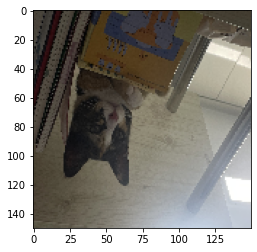

In [ ]:
pred('/content/555.jpg')

[0.]
777.jpg사진은 고양이 입니다.


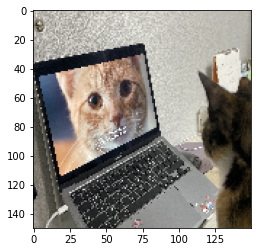

In [ ]:
pred('/content/777.jpg')